## Getting Data  and Packages

In [1]:
#restart the kernel after installation
!#pip install pandas-profiling --quiet

'#pip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
from urllib.request import urlretrieve

In [4]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x15ddb8e6440>)

In [5]:
import pandas as pd

medical_df = pd.read_csv("medical.csv")
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer.

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and regio

Let's check the data type for each column.n.

In [6]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Looks like "age", "children", "bmi" (body mass index) and "charges" are numbers, whereas "sex", "smoker" and "region" are strings (possibly categories). None of the columns contain any missing values, which saves us a fair bit of work!

Here are some statistics for the numerical columns:

In [7]:
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

The ranges of values in the numerical columns seem reasonable too (no negative ages!), so we may not have to do much data cleaning or correction. The "charges" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

## Exploratory Analysis and Visualization
Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

In [24]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%matplotlib widget

In [25]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


### Age
Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [26]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [27]:
fig =  px.histogram(medical_df,
                    x = 'age',
                    marginal = 'box',
                    nbins = 47,
                    title = 'Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

### Body Mass Index
Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [28]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

### Charges
Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [29]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Visualizing other factors like Sex and region

In [32]:
fig = px.histogram(medical_df, 
                   x='sex', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Variation for Sex')
fig.update_layout(bargap=0.1)
fig.show()

In [33]:
fig = px.histogram(medical_df, 
                   x='region', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Variation in Region')
fig.update_layout(bargap=0.1)
fig.show()

In [34]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [35]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

### Age and Charges
Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [36]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

### BMI and Charges
Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.



In [38]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

### Correlation
As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.

In [40]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [41]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [42]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

Here's how correlation coefficients can be interpreted (source):
``
Streng``th: The greater the absolute value of the correlation coefficient, the stronger the relationship.1. 

The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationshi2. p.

A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decre3. ase.

When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a`` line.
``
Direction: The sign of the correlation coefficient represents the direction of the relat1. ionship.

Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a sc2. atterplot.

Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visu

(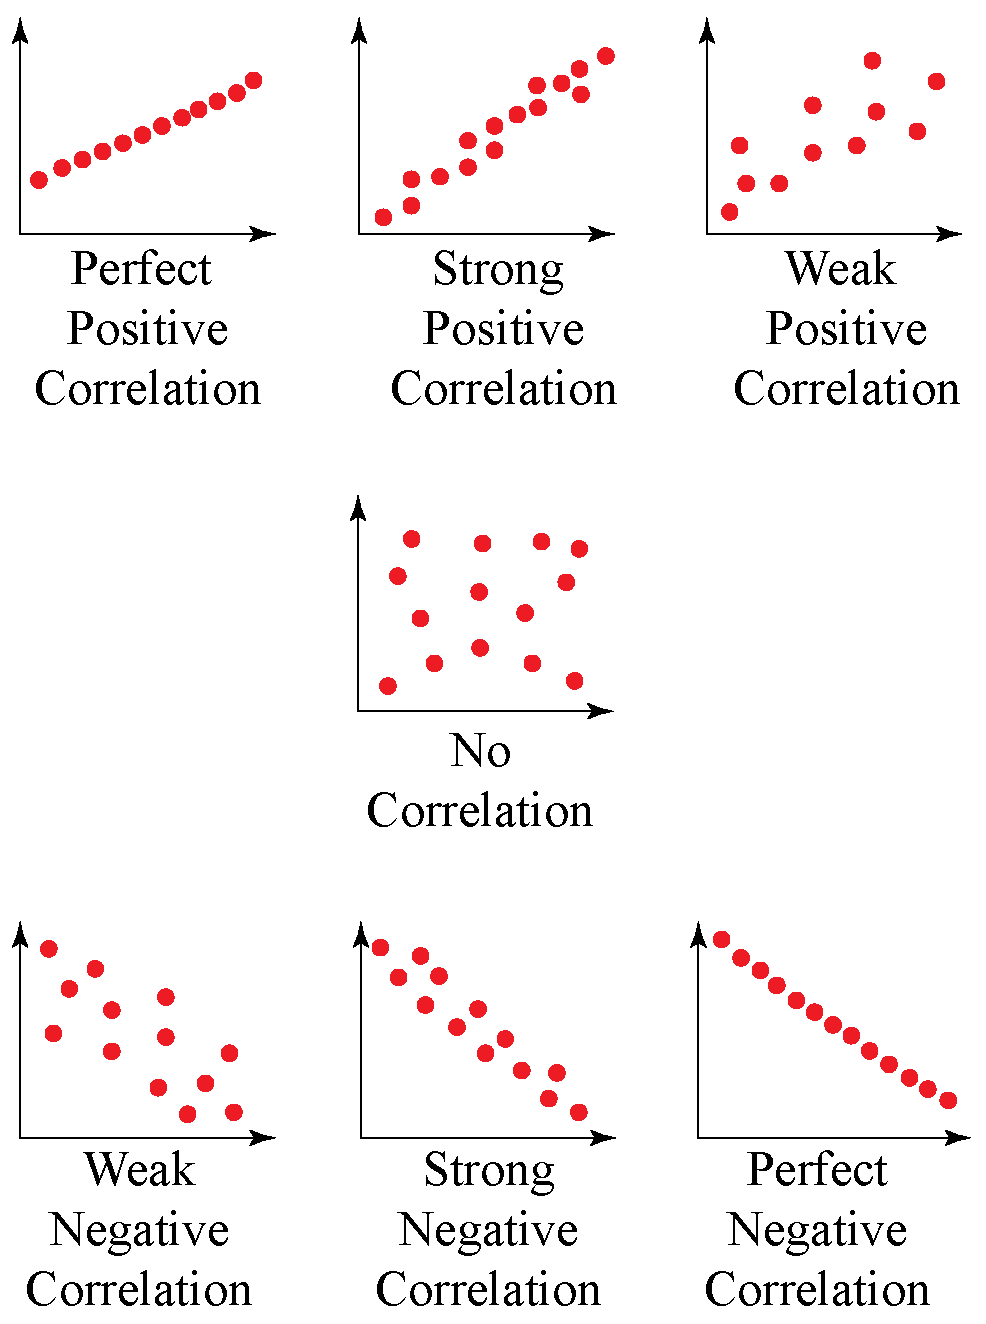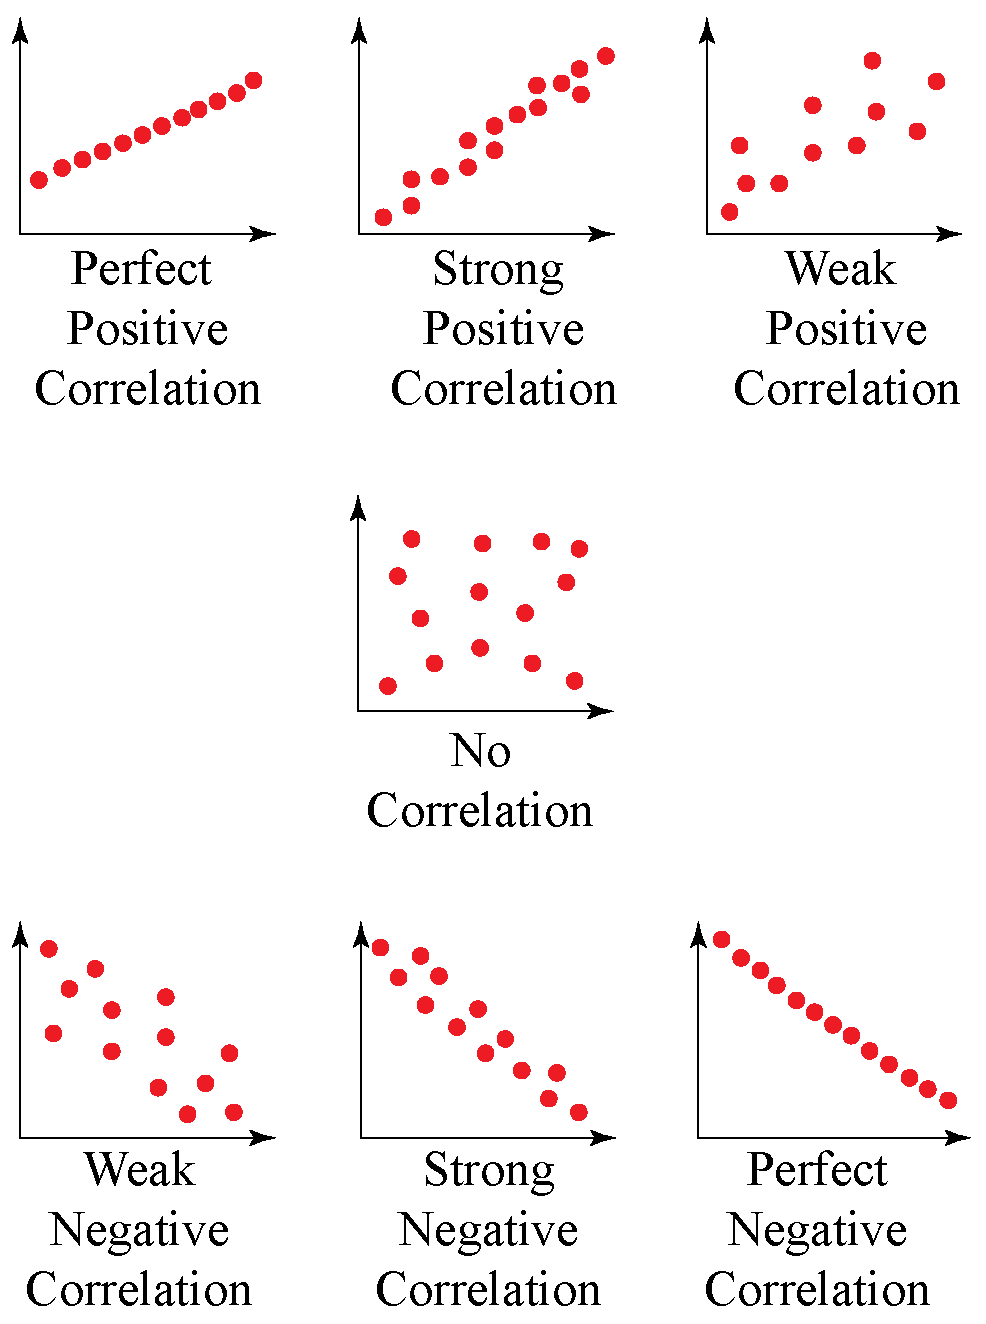
 y

 (source):

alt
The correlation coefficient has the
 
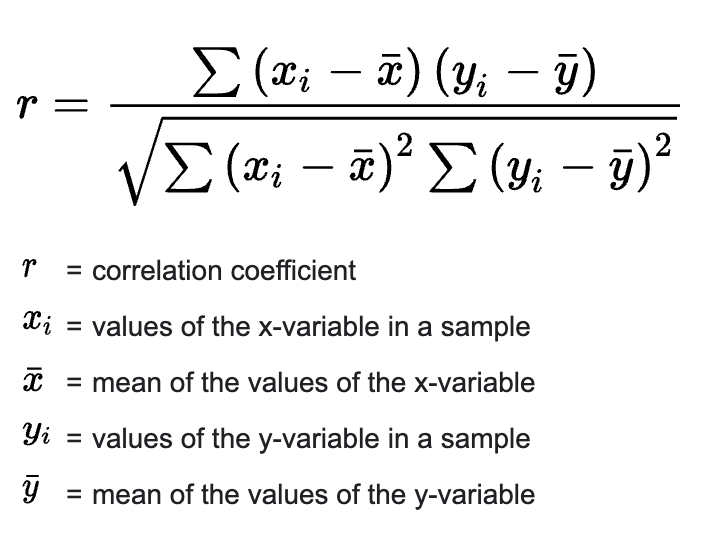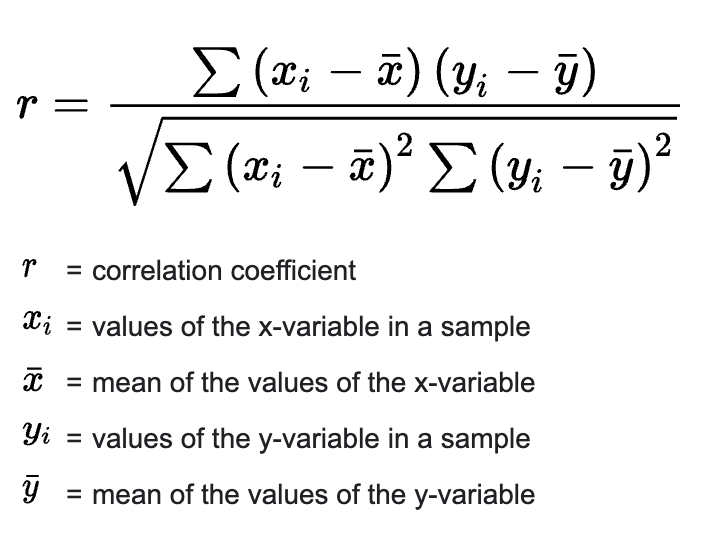

fowing formula:

alt
You can learn more about the mathematical definition and geometric interpretation

 of correlation here: https://www.youtube.cm/watch?v=xZ_z8KWkhXE

Pandas dataframes also provide a .corr method to compute the correlation coefficients between all pairs of numeric columns.

# Linear Regression using a Single Feature
We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [48]:
non_smoker_df = medical_df[medical_df.smoker == 'no' ]

In [51]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);


Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:
**y=wx+b**


### Model
In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assuming the following relationship between the two:

charges=w×age+b

In [53]:
def estimate_charges(age, w, b):
    return w * age + b

In [54]:
w = 50
b = 100

In [55]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

In [58]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');


In [59]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [60]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

In [61]:
try_parameters(60, 200)

In [62]:
try_parameters(400, 5000)

## Loss/Cost Function
We can compare our model's predictions with the actual targets using the following method:

Calculate the difference between the targets and predictions (the differenced is called the "residual")
Square all elements of the difference matrix to remove negative values.
Calculate the average of the elements in the resulting matrix.
Take the square root of the result
The result is a single number, known as the root mean squared error (RMSE). The above description can be stated mathematically as follows:

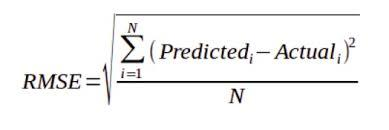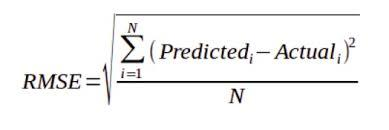

Geometrically, the residuals can be visualized as follows:
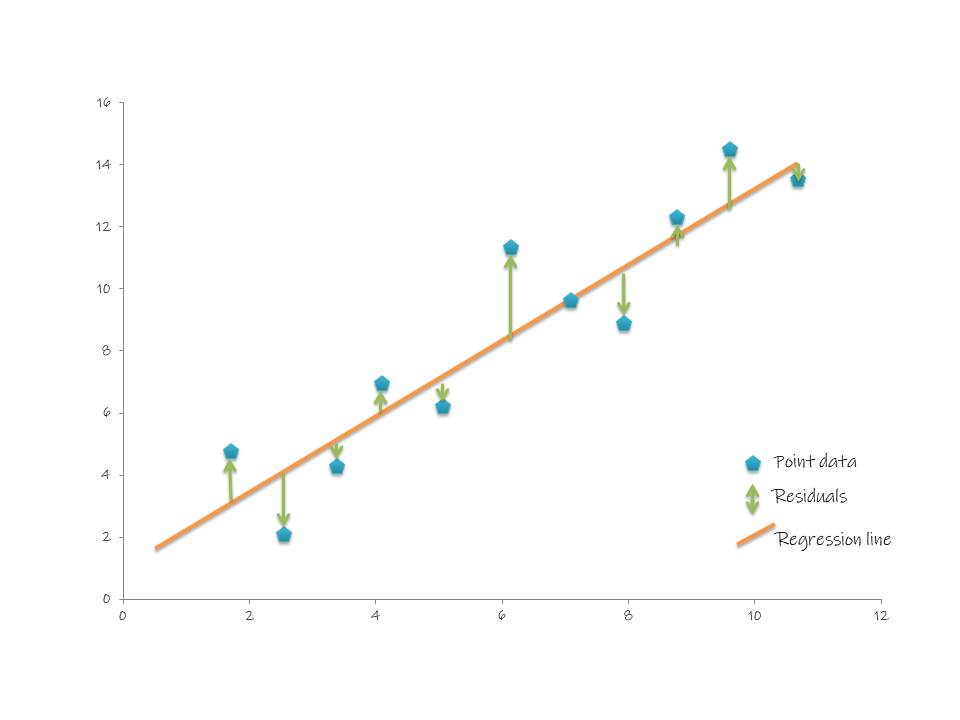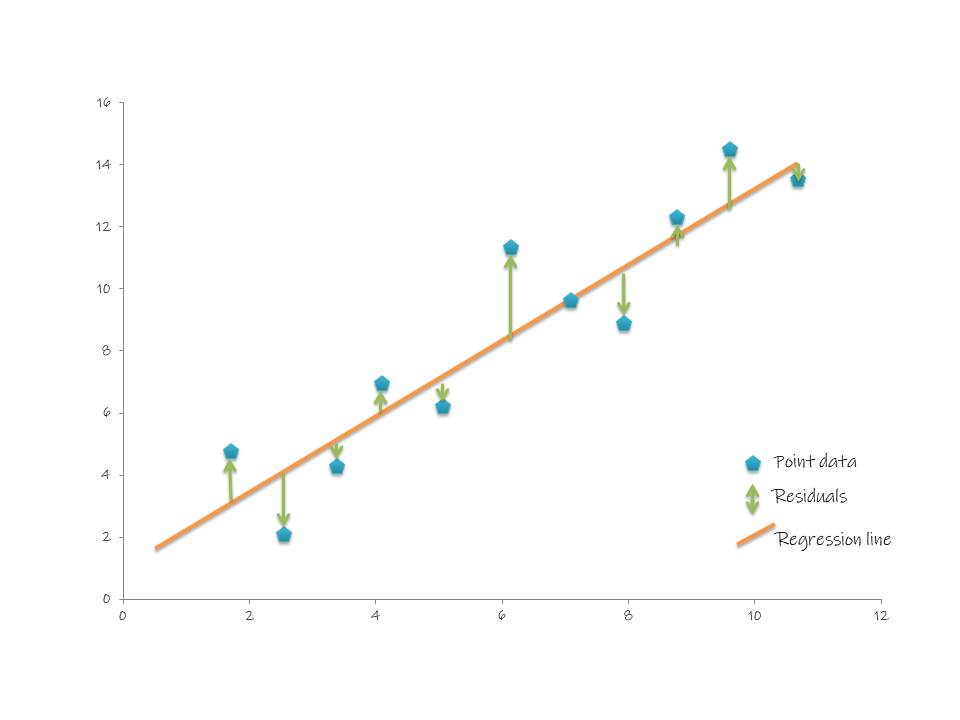


In [63]:
import numpy as np

In [64]:
def rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [65]:
w = 50
b = 100

try_parameters(w,b)

In [66]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [67]:
rmse(targets, predicted)

8461.949562575493

In [68]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

In [69]:
try_parameters(50, 100)

RMSE Loss:  8461.949562575493


## Linear Regression using Scikit-learn
In practice, you'll never need to implement either of the above methods yourself. You can use a library like scikit-learn to do this for you.

In [71]:
from sklearn.linear_model import LinearRegression

model  =  LinearRegression()

Next, we can use the `fit` method of the model to find the best fit line for the inputs and targets.

In [73]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [74]:
inputs =  non_smoker_df[['age']]
targets =  non_smoker_df.charges
print('input_shape :' , inputs.shape)
print('target_shape:' , targets.shape)

input_shape : (1064, 1)
target_shape: (1064,)


In [75]:
model.fit(inputs, targets)

LinearRegression()

In [76]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

C:\Users\aniru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [77]:
predictions  = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [78]:
rmse(targets, predictions)

4662.505766636395

In [79]:
try_parameters(model.coef_, model.intercept_)

RMSE Loss:  4662.505766636395


# Linear Regression using Multiple Features
So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward.

In [80]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [81]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833271

In [82]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [83]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [84]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

In [85]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542205

In [95]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


# One-hot Encoding
The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region

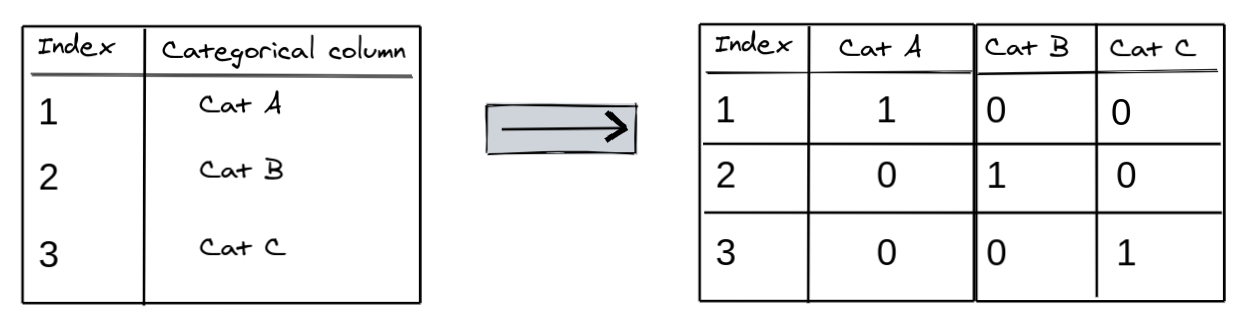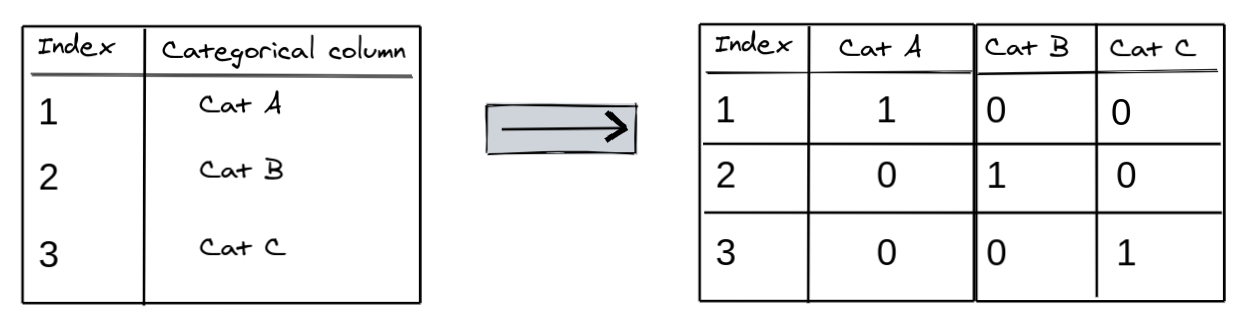

In [96]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [97]:
sns.barplot(data=medical_df, x='region', y='charges');

In [98]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [99]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [100]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [101]:
medical_df

age     sex     bmi  children smoker     region      charges  northeast  \
0      19  female  27.900         0    yes  southwest  16884.92400        0.0   
1      18    male  33.770         1     no  southeast   1725.55230        0.0   
2      28    male  33.000         3     no  southeast   4449.46200        0.0   
3      33    male  22.705         0     no  northwest  21984.47061        0.0   
4      32    male  28.880         0     no  northwest   3866.85520        0.0   
...   ...     ...     ...       ...    ...        ...          ...        ...   
1333   50    male  30.970         3     no  northwest  10600.54830        0.0   
1334   18  female  31.920         0     no  northeast   2205.98080        1.0   
1335   18  female  36.850         0     no  southeast   1629.83350        0.0   
1336   21  female  25.800         0     no  southwest   2007.94500        0.0   
1337   61  female  29.070         0    yes  northwest  29141.36030        0.0   

      northwest  southeast  southwest  sex_code  smoker_code  
0           0.0        0.0        1.0         0            1  
1           0.0        1.0        0.0         1            0  
2           0.0        1.0        0.0         1            0  
3           1.0        0.0        0.0         1            0  
4           1.0        0.0        0.0         1            0  
...         ...        ...        ...       ...          ...  
1333        1.0        0.0        0.0         1            0  
1334        0.0        0.0        0.0         0            0  
1335        0.0        1.0        0.0         0            0  
1336        0.0        0.0        1.0         0            0  
1337        1.0        0.0        0.0         0            1  

[1338 rows x 13 columns]

In [102]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [104]:
sns.barplot(data=medical_df, x='sex', y='charges')

<Axes: title={'center': 'Age vs. Charges'}, xlabel='sex', ylabel='charges'>